# Day 56/60 Machine Learning from the scratch  Scikit-learn: part 10
# Logistic Regression 

<h4>Logistic Regression: <br><br>
    It is a supervised learning algorithm that makes use of logistic functions to estimates the probability of binary outcome i.e an event occurring, such as voted or didn't vote, based on a given data set of independent variables.<br><br> Sigmoid y =(1/1+e^(-mx-b)) 
</h4>

In [43]:
import pandas as pd

In [44]:
d = {'miles_per_week': [37,39,46,51,88,17,18,20,21,22,23,24,25,27,28,29,30,31,32,33,34,38,40,42,57,68,35,36,41,43,45,47,49,50,52,53,54,55,56,58,59,60,61,63,64,65,66,69,70,72,73,75,76,77,78,80,81,82,83,84,85,86,87,89,91,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,113,114,115,116,116,118,119,120,121,123,124,126,62,67,74,79,90,112],
      'completed_50m_ultra': ['no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','yes','yes','yes','yes','no','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes',]}

In [45]:
df = pd.DataFrame(data = d)

In [46]:
df.head(5)

,miles_per_week,completed_50m_ultra
0,37,no
1,39,no
2,46,no
3,51,no
4,88,no


In [47]:
df.shape

(101, 2)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   miles_per_week       101 non-null    int64 
 1   completed_50m_ultra  101 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [49]:
#Ordinal Encoder since we have a categorical data
from sklearn.preprocessing import OrdinalEncoder

In [50]:
# lets change the completed_50m_ultra to 0 and 1

In [51]:
finished_race = ['no','yes']

In [52]:
enc = OrdinalEncoder(categories = [finished_race])

In [53]:
df['completed_50m_ultra'] = enc.fit_transform(df[['completed_50m_ultra']])

In [54]:
df

,miles_per_week,completed_50m_ultra
0,37,0.0
1,39,0.0
2,46,0.0
3,51,0.0
4,88,0.0
...,...,...
96,67,1.0
97,74,1.0
98,79,1.0
99,90,1.0


In [57]:
import matplotlib.pyplot as plt

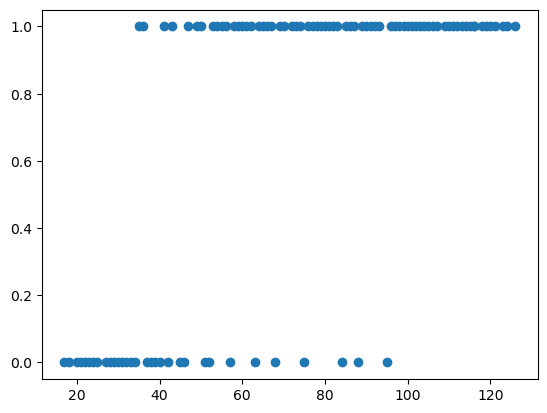

In [59]:
# scatter plot
plt.scatter(df.miles_per_week, df.completed_50m_ultra)

In [60]:
import seaborn as sns

<Axes: xlabel='completed_50m_ultra', ylabel='count'>

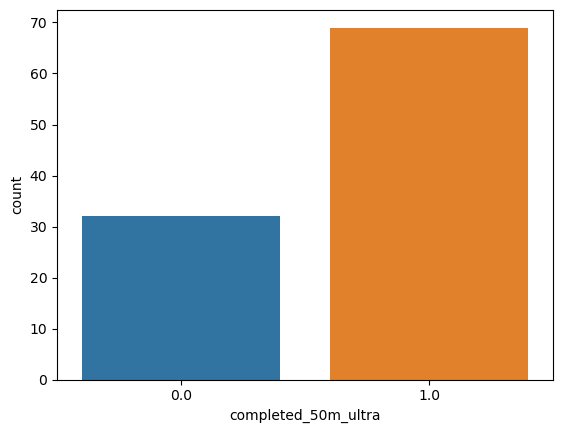

In [62]:
sns.countplot(x = 'completed_50m_ultra', data =df)

In [63]:
# splitting into x and y

X = df.iloc[: , 0:1]

In [64]:
y = df.iloc[: , 1]

In [66]:
X

,miles_per_week
0,37
1,39
2,46
3,51
4,88
...,...
96,67
97,74
98,79
99,90


In [67]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
96     1.0
97     1.0
98     1.0
99     1.0
100    1.0
Name: completed_50m_ultra, Length: 101, dtype: float64

In [72]:
from sklearn.model_selection import train_test_split

In [88]:
X_train , X_test , y_train, y_test = train_test_split(X,y, train_size = 0.8 , random_state = 11)

In [89]:
X_train.shape

(80, 1)

In [90]:
X_test.shape

(21, 1)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
model = LogisticRegression()

In [93]:
model.fit(X_train,y_train)

LogisticRegression()

In [94]:
y_pred = model.predict(X_test)

In [95]:
model.score(X_test, y_test)

0.9047619047619048

In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
cm = confusion_matrix(y_test, y_pred)

In [98]:
print(cm)

[[ 5  1]
 [ 1 14]]


In [99]:
from sklearn.metrics import classification_report

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83         6
         1.0       0.93      0.93      0.93        15

    accuracy                           0.90        21
   macro avg       0.88      0.88      0.88        21
weighted avg       0.90      0.90      0.90        21

